In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences


# train = [line.strip() for line in open(("/content/drive/MyDrive/Mini Project/test.txt"), "r").readlines()[0:1000]]
# raw_x_train = [line.split("\t")[1] for line in train]
# raw_y_train = [line.split("\t")[0] for line in train]

train = [line.strip() for line in open("train.txt", "r").readlines()[1:]]
raw_x_train = [line.split("\t")[1] for line in train]
raw_y_train = [line.split("\t")[0] for line in train]

test = [line.strip() for line in open("test.txt", "r").readlines()[:100000]]
raw_x_test = [line.split("\t")[1] for line in test]
raw_y_test = [line.split("\t")[0] for line in test]


In [6]:
# Initialize Tokenizer
tokener = Tokenizer(lower=True, char_level=True, oov_token='-n-')

# Fit tokenizer on texts
tokener.fit_on_texts(raw_x_train)

# Convert texts to sequences
sequences = tokener.texts_to_sequences(raw_x_train)
sequences_1=tokener.texts_to_sequences(raw_x_test)

# Padding sequences
max_length = 200  # Set the maximum length you want for your sequences
x_train = pad_sequences(sequences, maxlen=max_length)
x_test=pad_sequences(sequences_1, maxlen=max_length)

# Convert labels to numerical values
encoder = LabelEncoder()
y_train = encoder.fit_transform(raw_y_train)
y_test = []
skipped_indices = []

# Convert labels to numerical values for test data, skipping tuples with unseen labels
for i, label in enumerate(raw_y_test):
    try:
        encoded_label = encoder.transform([label])[0]
        y_test.append(encoded_label)
    except ValueError:
        # Skip the tuple with unseen label
        skipped_indices.append(i)
        continue

y_test = np.array(y_test)

# Remove skipped entries from x_test
x_test = np.delete(x_test, skipped_indices, axis=0)


SVM Classification

In [8]:
from sklearn.decomposition import PCA

# Assuming x_train and x_test are your data
pca = PCA(n_components=50)  # You can change the number of components

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state = 0)
svm_classifier.fit(x_train_pca, y_train)

In [ ]:
svm_y_pred = svm_classifier.predict(x_test_pca)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
svm_cm = confusion_matrix(y_test, svm_y_pred)
print(svm_cm)

print("Accuracy:",accuracy_score(y_test, svm_y_pred)*100)
svm_cr=classification_report(y_test,svm_y_pred)
print(svm_cr)

[[49032  6451]
 [11680 32837]]


0.81869

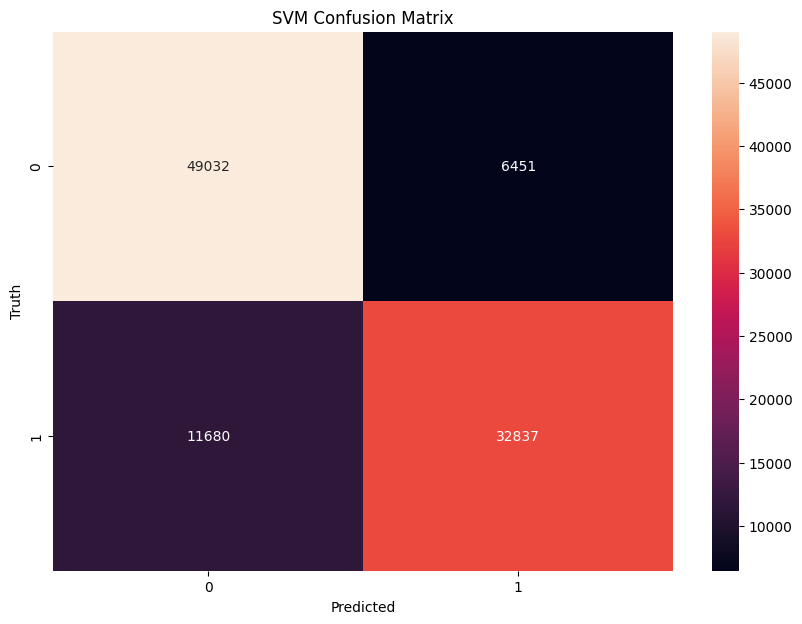

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(svm_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('SVM Confusion Matrix')
plt.show()


xG Boost Classifier

In [21]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()
xg_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xg_y_pred=xg_classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

xg_cm = confusion_matrix(y_test, xg_y_pred)
print('xGBoost Confusion Matrix:',end='/t')
print(xg_cm)

print("Accuracy:",accuracy_score(y_test, xg_y_pred)*100)

print
xg_cr=classification_report(y_test,xg_y_pred)
print(xg_cr)

xGBoost Confusion Matrix:/t[[51731  3752]
 [ 3995 40522]]
Accuracy: 92.253
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     55483
           1       0.92      0.91      0.91     44517

    accuracy                           0.92    100000
   macro avg       0.92      0.92      0.92    100000
weighted avg       0.92      0.92      0.92    100000



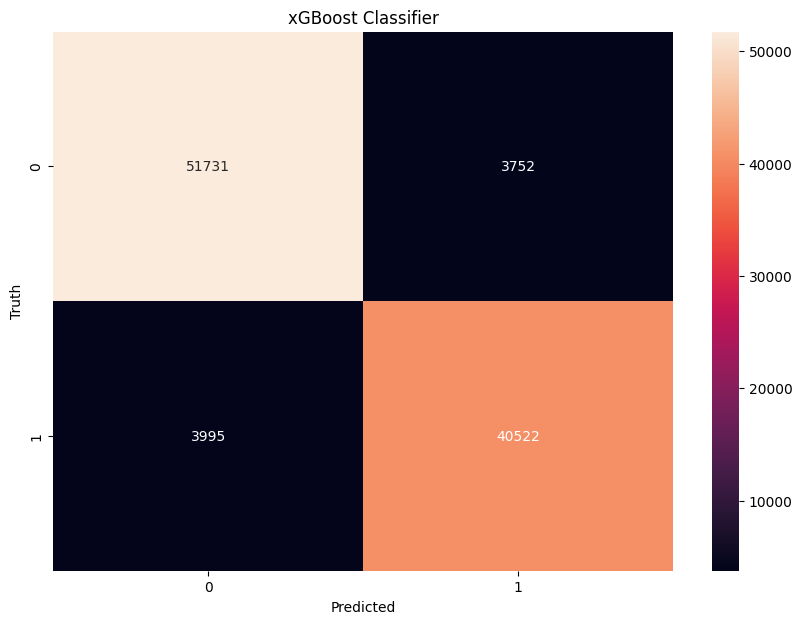

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(xg_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('xGBoost Classifier')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [18]:
nb_y_pred = nb_classifier.predict(x_test)
print(np.concatenate((nb_y_pred.reshape(len(nb_y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 0]]


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
nb_cm = confusion_matrix(y_test, nb_y_pred)
print('Naive Bayes Confusion Matrix:')
print(nb_cm)

print("Accuracy:",accuracy_score(y_test, nb_y_pred)*100)

print('Classification Report of Naive Bayes:')
nb_cr=classification_report(y_test,nb_y_pred)
print(nb_cr)

Naive Bayes Confusion Matrix:
[[49638  5845]
 [35057  9460]]
Accuracy: 59.09799999999999
Classification Report of Naive Bayes:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71     55483
           1       0.62      0.21      0.32     44517

    accuracy                           0.59    100000
   macro avg       0.60      0.55      0.51    100000
weighted avg       0.60      0.59      0.53    100000



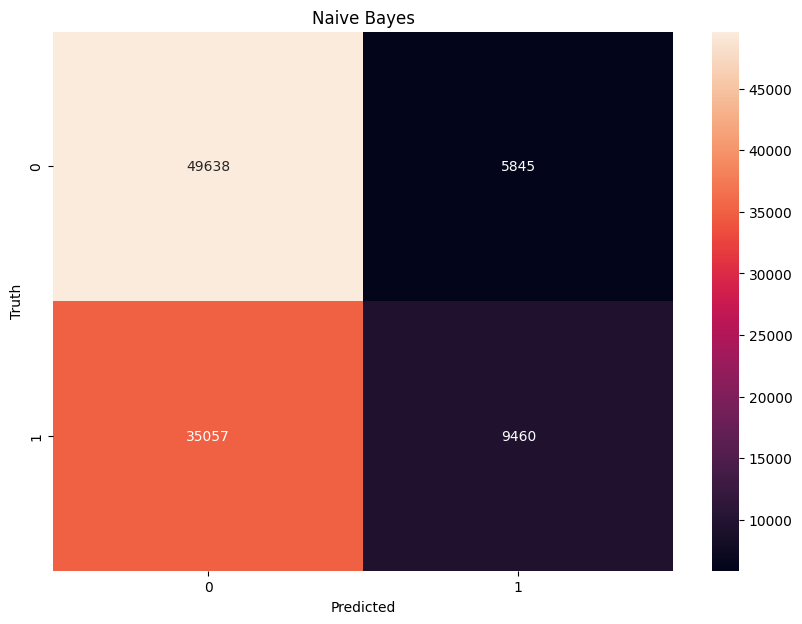

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(nb_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Naive Bayes')
plt.show()
